## Importação das bibliotecas

```
pandas:                     Manipulação de dados. Carregar, organizar e  explorar dados.
numpy:                      Operações matemáticas e geração de dados numéricos.
matplotlib.pyplot:          Visualização de dados em gráficos.
sklearn LinearRegression:   Algoritmo ML de Regressão Linear.
sklearn train_test_split:   Separar os dados em Treino e Teste.
sklearn.metrics:            Métricas de avaliação de modelos.
mlflow:                     Registrar parâmetros, métricas e salvar o modelo treinado.
```

In [24]:
# Importar bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow
import mlflow.sklearn

## Carregamento do dados

Dados fictícios gerados com auxílio de IA Generativa. Os dados são divididos em data, temperatura e quantidade de vendas, realizados no ano de 2024. 

Para a criação foi considerado as temperaturas médias desse ano em cidades do Brasil. 

Disponível em https://pt.weatherspark.com/countries/BR

In [25]:
df = pd.read_csv("vendas_2024.csv")

# Visualização dos primeiros itens 
df.head()


,Data (aa-mm-dd),Temperatura (°C),Vendas de Sorvete (unidades)
0,2024-01-01,30.2,283
1,2024-01-02,27.4,213
2,2024-01-03,28.1,229
3,2024-01-04,25.8,184
4,2024-01-05,29.5,269


## Relação entre a Temperatura e a Quantidade de Vendas

Visualização por **gráfico de dispersão**, um tipo de gráfico que exibe a relação entre duas variáveis quantitativas, representando cada par de dados como um ponto em um plano cartesiano.

Fazemos o uso deste gráfico pois queremos verificar se há uma tendêcia crescente, decrescente ou nenhuma, quando analisamos a quantidade de vendas e a temperatura.

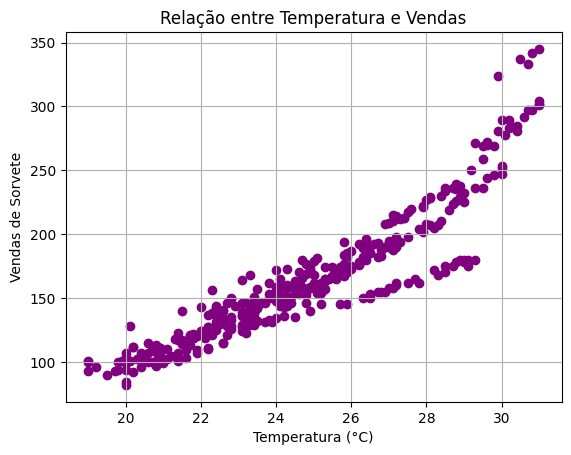

In [26]:
# Renomeando nome das colunas
df.columns = ['data', 'temperatura', 'vendas']

# Visualização dos dados por Gráfico de Dispersão
plt.scatter(df['temperatura'], df['vendas'], color='purple')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvete')
plt.title('Relação entre Temperatura e Vendas')
plt.grid(True)
plt.show()

## Treinamento do modelo de regressão

In [27]:
# Separando dados em treino e teste
X = df[['temperatura']]
y = df['vendas']
# 80% para treino 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo usando Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Gerar previsões
y_pred = modelo.predict(X_test)

## Visualização da Reta de Regressão 


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


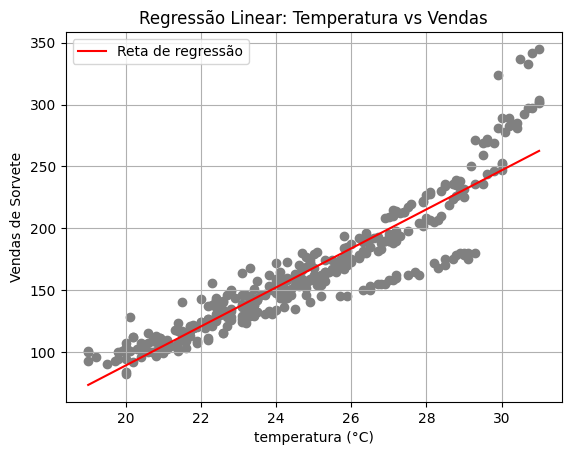

In [28]:
# Dados
plt.scatter(df['temperatura'], df['vendas'], color='grey')

# Reta de regressão
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_range = modelo.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range, color='red', label='Reta de regressão')

plt.xlabel('temperatura (°C)')
plt.ylabel('Vendas de Sorvete')
plt.title('Regressão Linear: Temperatura vs Vendas')
plt.legend()
plt.grid(True)
plt.show()


## Avaliação do modelo

In [29]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 16.59
RMSE: 24.93
R²: 0.79


## Registro MLFlow

In [ ]:
mlflow.set_experiment("gelato-magico-regressao")

with mlflow.start_run():
    mlflow.log_param("modelo", "LinearRegression")
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)
    mlflow.sklearn.log_model(modelo, "modelo_regressao")